In [198]:
import pandas as pd
import numpy as np

csv = pd.read_csv('option.csv')
csv.columns = csv.loc[0]
csv = csv.drop(0)
csv


,Date,Close,Score1,Score2,Score3,Change
1,2022-05-25,397.3699951,0.455,0.556,2,7.940002441
2,2022-05-26,405.3099976,-0.125,0,0.238,9.950012207
3,2022-05-27,415.2600098,0.167,0.444,1,-2.33001709
4,2022-05-31,412.9299927,NaN,NaN,NaN,-3.339996338
5,2022-06-01,409.5899963,NaN,NaN,NaN,7.800018311
6,2022-06-02,417.3900146,-0.137,0.111,-0.529,-6.850006104
7,2022-06-03,410.5400085,NaN,NaN,NaN,1.25
8,2022-06-06,411.7900085,NaN,NaN,NaN,3.949981689
9,2022-06-07,415.7399902,0.2,0,-0.333,-4.519989014
10,2022-06-08,411.2200012,0.368,0.474,-0.333,-9.779998779


In [42]:
csv.shape

(37, 6)

In [292]:
from sklearn.preprocessing import MinMaxScaler

selected_df = csv.filter(['Score1','Score2','Score3','Change'])
# selected_df = csv.filter(['Score2','Score3','Change'])
selected_df = selected_df.dropna()
selected_df = selected_df.reset_index(drop=True)

# print(selected_df)

# selected_df = csv.filter(['Score1','Score2','Score3','Change'])
y = selected_df['Change']
# print(change)
y = pd.to_numeric(y)
for i in range(len(y)):
    if y.iloc[i] > 0:
        y.iloc[i] = 1
    else:
        y.iloc[i] = 0

train_df = selected_df.filter(['Score1','Score2','Score3'])
# train_df = selected_df.filter(['Score2','Score3'])

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(train_df)

X = pd.DataFrame(scaled)
X.columns = ['Score1','Score2','Score3']
# X.columns = ['Score2','Score3']

print(X)
print(y)

      Score1    Score2    Score3
0   0.832676  1.000000  0.587345
1   0.374901  0.533557  0.344979
2   0.605367  0.906040  0.449794
3   0.365430  0.626678  0.239477
4   0.631413  0.533557  0.266437
5   0.764009  0.931208  0.266437
6   0.385951  0.460570  0.249656
7   0.239148  0.032718  0.223246
8   0.509471  0.470973  0.338239
9   0.034728  0.017617  0.262999
10  0.034728  0.000000  0.128886
11  0.000000  0.413591  0.312242
12  0.035517  0.501258  0.174691
13  0.276243  0.440436  0.724897
14  0.798737  0.444631  0.280468
15  0.670876  0.307047  1.000000
16  0.526204  0.493624  0.358047
17  0.605367  0.533557  0.587345
18  0.394633  0.436242  0.284732
19  1.000000  0.864094  0.358047
20  0.549961  0.644295  0.301087
21  0.315706  0.145973  0.195873
22  0.221784  0.259228  0.381018
23  0.245462  0.395134  0.000000
24  0.276243  0.210570  0.632737
25  0.612470  0.768456  0.374828
0     1.0
1     1.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    1.0

In [318]:
selected_df = csv.filter(['Score1','Score2','Score3','Change'])
selected_df = selected_df.dropna()
selected_df = selected_df.reset_index(drop=True)
change = scaler.fit_transform(selected_df)
change = pd.DataFrame(change)
change.columns = ['Score1','Score2','Score3','Change']
# conc = pd.concat([X,change],axis = 1)
print(change.corr())

          Score1    Score2    Score3    Change
Score1  1.000000  0.714460  0.335018 -0.089147
Score2  0.714460  1.000000  0.144258  0.028479
Score3  0.335018  0.144258  1.000000  0.278158
Change -0.089147  0.028479  0.278158  1.000000


In [286]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75)
input_shape = [X_train.shape[1]]

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),   
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
1/1 [==============================] - 1s 939ms/step - loss: 0.6351 - binary_accuracy: 0.6316 - val_loss: 0.6946 - val_binary_accuracy: 0.4286
Epoch 2/200
1/1 [==============================] - 0s 28ms/step - loss: 0.5942 - binary_accuracy: 0.6316 - val_loss: 0.6929 - val_binary_accuracy: 0.5714
Epoch 3/200
1/1 [==============================] - 0s 32ms/step - loss: 0.5243 - binary_accuracy: 0.6842 - val_loss: 0.6915 - val_binary_accuracy: 0.4286
Epoch 4/200
1/1 [==============================] - 0s 31ms/step - loss: 0.6465 - binary_accuracy: 0.7895 - val_loss: 0.6904 - val_binary_accuracy: 0.5714
Epoch 5/200
1/1 [==============================] - 0s 30ms/step - loss: 0.6264 - binary_accuracy: 0.7368 - val_loss: 0.6894 - val_binary_accuracy: 0.5714
Epoch 6/200
1/1 [==============================] - 0s 32ms/step - loss: 0.5483 - binary_accuracy: 0.7368 - val_loss: 0.6885 - val_binary_accuracy: 0.5714
Epoch 7/200
1/1 [==============================] - 0s 34ms/step - loss: 0.5

<AxesSubplot:title={'center':'Accuracy'}>

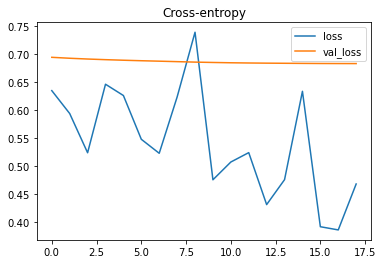

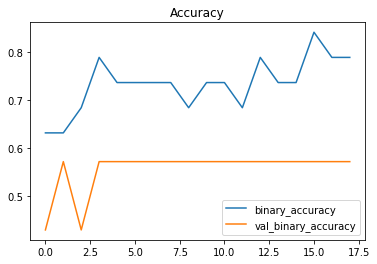

In [287]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [291]:
prediction= model.predict(X_valid)
print(prediction)
print(y_valid)

[[0.46085262]
 [0.46947905]
 [0.4472984 ]
 [0.45938453]
 [0.4735132 ]
 [0.4631151 ]
 [0.46407387]]
10    1.0
16    1.0
23    0.0
12    1.0
2     0.0
9     0.0
6     0.0
Name: Change, dtype: float64
